# INTERPOLATION FOR TABLES WITH CONSTANT STEP.

## Theoretical information
#### Finite differences.  
Let the values of a function be known y=f(x) for equidistant values of the argument $ x_{k}=x_{0}+k*h $ (k=0,1,...,n).  
Finite differences of the first order are the following quantities:  
$$ Δy_{0}=y_{1}-y_{0};  Δy_{1}=y_{2}-y_{1};...  Δy_{k}=y_{k+1}-y_{k}...   $$  

Similarly, finite differences of the second order are defined:  
$$ Δ^2y_{0}=Δy_{1}-Δy_{0};  Δ^2y_{1}=Δy_{2}-Δy_{1};...  Δ^2y_{k}=Δy_{k+1}-Δy_{k}...  $$
We express the finite differences of m+1 order in terms of finite differences m of order:
$$ Δ^{m+1}y_{0}=Δ^my_{1}-Δ^my_{0};  Δ^{m+1}y_{1}=Δ^my_{2}-Δ^my_{1};...  Δ^{m+1}y_{k}=Δ^my_{k+1}-Δ^my_{k}...  $$

#### The first interpolation formula of Newton.
The Newton interpolation polynomial is a form of writing the interpolation polynomial $P_{n}(x)$, which allows refinement of interpolation results by successive addition of new nodes.  
The first interpolation formula of Newton has the form:
$$ P_{n}(x_{0}+q*h)=y_{0}+q*Δy_{0}+{q*(q-1)\over 2!}*Δ^2y_{0}+...+{q*(q-1)...(q-n+1)\over n!}*Δ^ny_{0} $$
where $ q={x-x_{0}\over h} $.  

The formula is used for interpolation at points close to the beginning of the table $x_{0}$, therefore it is also called the Newton interpolation formula for interpolation at the beginning of the table. Note that the finite differences included in Newton's first interpolation formula are located in the upper oblique line of the finite differences table.  

The error of Newton's first interpolation formula is written in the form
$$ R_{n}(x)=R_{n}(x_{0}+q*h)={q*(q-1)...(q-n)\over (n+1)!}h^{n+1}f^{n+1}(ξ),$$
Where ξ is some point of the interval containing the interpolation nodes.

#### The second interpolation formula of Newton.

Let the interpolation point x lie near the end point of the table $x_{n}$. In this case, the second interpolation formula of Newton
$$ P_{n}(x_{0})=y_{n}+q*Δy_{n-1}+{q*(q+1)\over 2!}*Δ^2y_{n-2}+...+{q*(q+1)...(q+n-1)\over n!}*Δ^ny_{0}  $$
where $ q={x-x_{n}\over h} $.

## Implementation of the first and second interpolation formula of Newton on Python

With Mathlab take the library pylab and assign a variable plt

In [1]:
from matplotlib import pylab as plt
%matplotlib inline

A library named numpy is imported

In [2]:
import numpy as np

A function is created for the first Newton interpolation formula

In [3]:
def interp1(x, X, Y, h):
    print("The first interpolation formula of Newton.")
    n = int(Y.shape[0] - 1)
    print(n)
    kon_razn = np.zeros((n, n))

    for i in range(0, Y.shape[0] - 1):
        kon_razn[0][i] = Y[i + 1] - Y[i]

    for i in range(1, kon_razn.shape[0]):
        for j in range(0, kon_razn.shape[1] - i):
            kon_razn[i][j] = kon_razn[i - 1][j + 1] - kon_razn[i - 1][j]

    print("Finite differences: ")
    print(kon_razn)

    res = Y[0]

    q = (x - X[0])/h

    for i in range(1, n):
        l = 1
        f = 1
        for j in range(1, i+1):
            f *= j
            l *= (q-j+1)
        res += (l/f)*kon_razn[i,0]

    return res

A function is created for the second Newton interpolation formula.  
The x, y, and step values are entered. A graph is constructed.

The second interpolation formula of Newton.
9
Finite differences: 
[[ 8.2600e-02  7.9370e-02  7.5910e-02  6.6270e-02  7.4450e-02  6.4500e-02
   6.0410e-02  5.6230e-02  5.1950e-02]
 [-3.2300e-03 -3.4600e-03 -9.6400e-03  8.1800e-03 -9.9500e-03 -4.0900e-03
  -4.1800e-03 -4.2800e-03  0.0000e+00]
 [-2.3000e-04 -6.1800e-03  1.7820e-02 -1.8130e-02  5.8600e-03 -9.0000e-05
  -1.0000e-04  0.0000e+00  0.0000e+00]
 [-5.9500e-03  2.4000e-02 -3.5950e-02  2.3990e-02 -5.9500e-03 -1.0000e-05
   0.0000e+00  0.0000e+00  0.0000e+00]
 [ 2.9950e-02 -5.9950e-02  5.9940e-02 -2.9940e-02  5.9400e-03  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00]
 [-8.9900e-02  1.1989e-01 -8.9880e-02  3.5880e-02  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00]
 [ 2.0979e-01 -2.0977e-01  1.2576e-01  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.1956e-01  3.3553e-01  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00]
 [ 7.5509e-01  0.0000e+00  0.

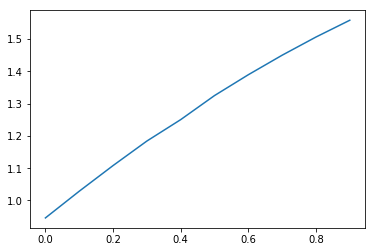

In [8]:
def interp2(x, X, Y, h):
    print("The second interpolation formula of Newton.")
    n = int(Y.shape[0]-1)
    print(n)
    kon_razn = np.zeros((n, n))

    for i in range(0, Y.shape[0]-1):
        kon_razn[0][i] = Y[i+1] - Y[i]

    for i in range(1, kon_razn.shape[0]):
        for j in range(0, kon_razn.shape[1]-i):
            kon_razn[i][j] = kon_razn[i-1][j+1] - kon_razn[i-1][j]

    print("Finite differences: ")
    print(kon_razn)

    res = Y[n]

    q = (x - X[n])/h

    for i in range(0, n):
        l = 1
        f = 1
        for j in range(1, i+2):
            f *= j
            l *= (q+j-1)
        res += (l/f)*kon_razn[i][(n-i-1)]
    return res
x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
y = np.array([0.94608, 1.02868, 1.10805, 1.18396, 1.25023, 1.32468, 1.38918, 1.44959, 1.50582, 1.55777])
x_p = 0.9
h = 0.1
plt.plot(x, y)
if abs(x_p-x[0]) < abs(x_p-x[-1]):
    print("Result: ", interp1(x_p, x, y, h))
else:
    print("Result: ", interp2(x_p, x, y, h))

Variant of tasks: http://localhost:8888/notebooks/practic/Newton_test.ipynb